In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras

In [4]:
pip install visualkeras

  Using cached visualkeras-0.0.2-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten
import visualkeras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score

In [6]:
train_path = r'D:\university\Thesis\final\Flower kath golap\1training'
test_path = r'D:\university\Thesis\final\Flower kath golap\2testing'
val_path = r'D:\university\Thesis\final\Flower kath golap\3vali'

Bloom


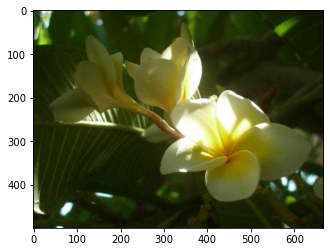

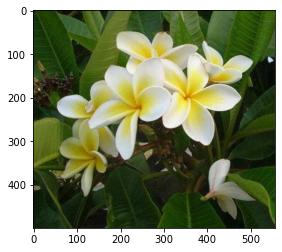

Post Bloom


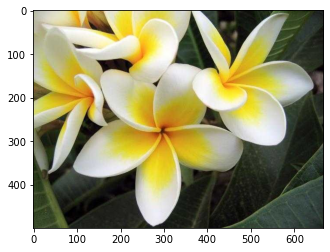

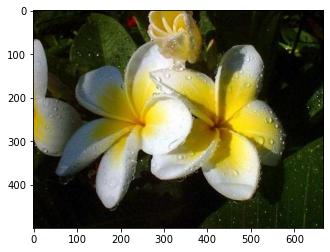

Pre Bloom


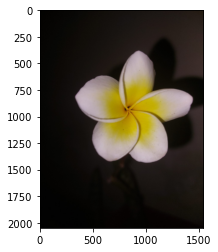

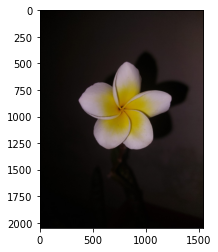

In [7]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [8]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+ "/" +img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [9]:
size = (250,250)

In [ ]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [ ]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [ ]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [ ]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

In [ ]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [ ]:
train_class.class_indices

In [ ]:
a = train_class.class_indices

In [ ]:
y_train.shape,y_test.shape,y_val.shape

In [ ]:
#x2
"""model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (250,250,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(25, activation = 'softmax'))"""

"""model3 = Sequential()
model3.add(Conv2D(filters=64,padding='same',kernel_size=(3,3),activation='relu',input_shape=(250,250,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(5,activation='softmax'))"""

# (3) Create a sequential model
model3 = Sequential()

# 1st Convolutional Layer
model3.add(Conv2D(filters=96, input_shape=(250,250,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model3.add(Activation('relu'))
# Pooling 
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model3.add(BatchNormalization())

# 2nd Convolutional Layer
model3.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model3.add(BatchNormalization())

# 3rd Convolutional Layer
model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Batch Normalisation
model3.add(BatchNormalization())

# 4th Convolutional Layer
model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Batch Normalisation
model3.add(BatchNormalization())

# 5th Convolutional Layer
model3.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model3.add(BatchNormalization())

# Passing it to a dense layer
model3.add(Flatten())
# 1st Dense Layer
model3.add(Dense(4096, input_shape=(224*224*3,)))
model3.add(Activation('relu'))
# Add Dropout to prevent overfitting
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# 2nd Dense Layer
model3.add(Dense(4096))
model3.add(Activation('relu'))
# Add Dropout
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# 3rd Dense Layer
model3.add(Dense(1000))
model3.add(Activation('relu'))
# Add Dropout
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# Output Layer
model3.add(Dense(17))
model3.add(Activation('softmax'))

model3.summary()

In [ ]:
cnn=model3

In [ ]:
for layer in cnn.layers:
    layer.trainable = False

x = Flatten()(cnn.output)
prediction = Dense(3, activation='softmax')(x)

model3 = Model(inputs=cnn.input, outputs=prediction)
model3.summary()

In [ ]:
#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
#model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
#model3.summary()
model3.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [3]:
#Training the CNN model1
#history = model3.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
#history3 = model3.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

history3 = model3.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 1,batch_size = 3,shuffle=True)

NameError: name 'model3' is not defined

In [21]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

In [22]:
#x
vgg2 = VGG16(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False) 

In [23]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

model1 = Model(inputs=vgg.input, outputs=prediction)
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [24]:
#x
for layer in vgg2.layers:
    layer.trainable = False

x = Flatten()(vgg2.output)
prediction = Dense(3, activation='softmax')(x)

model2 = Model(inputs=vgg2.input, outputs=prediction)
model2.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [25]:
model1.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

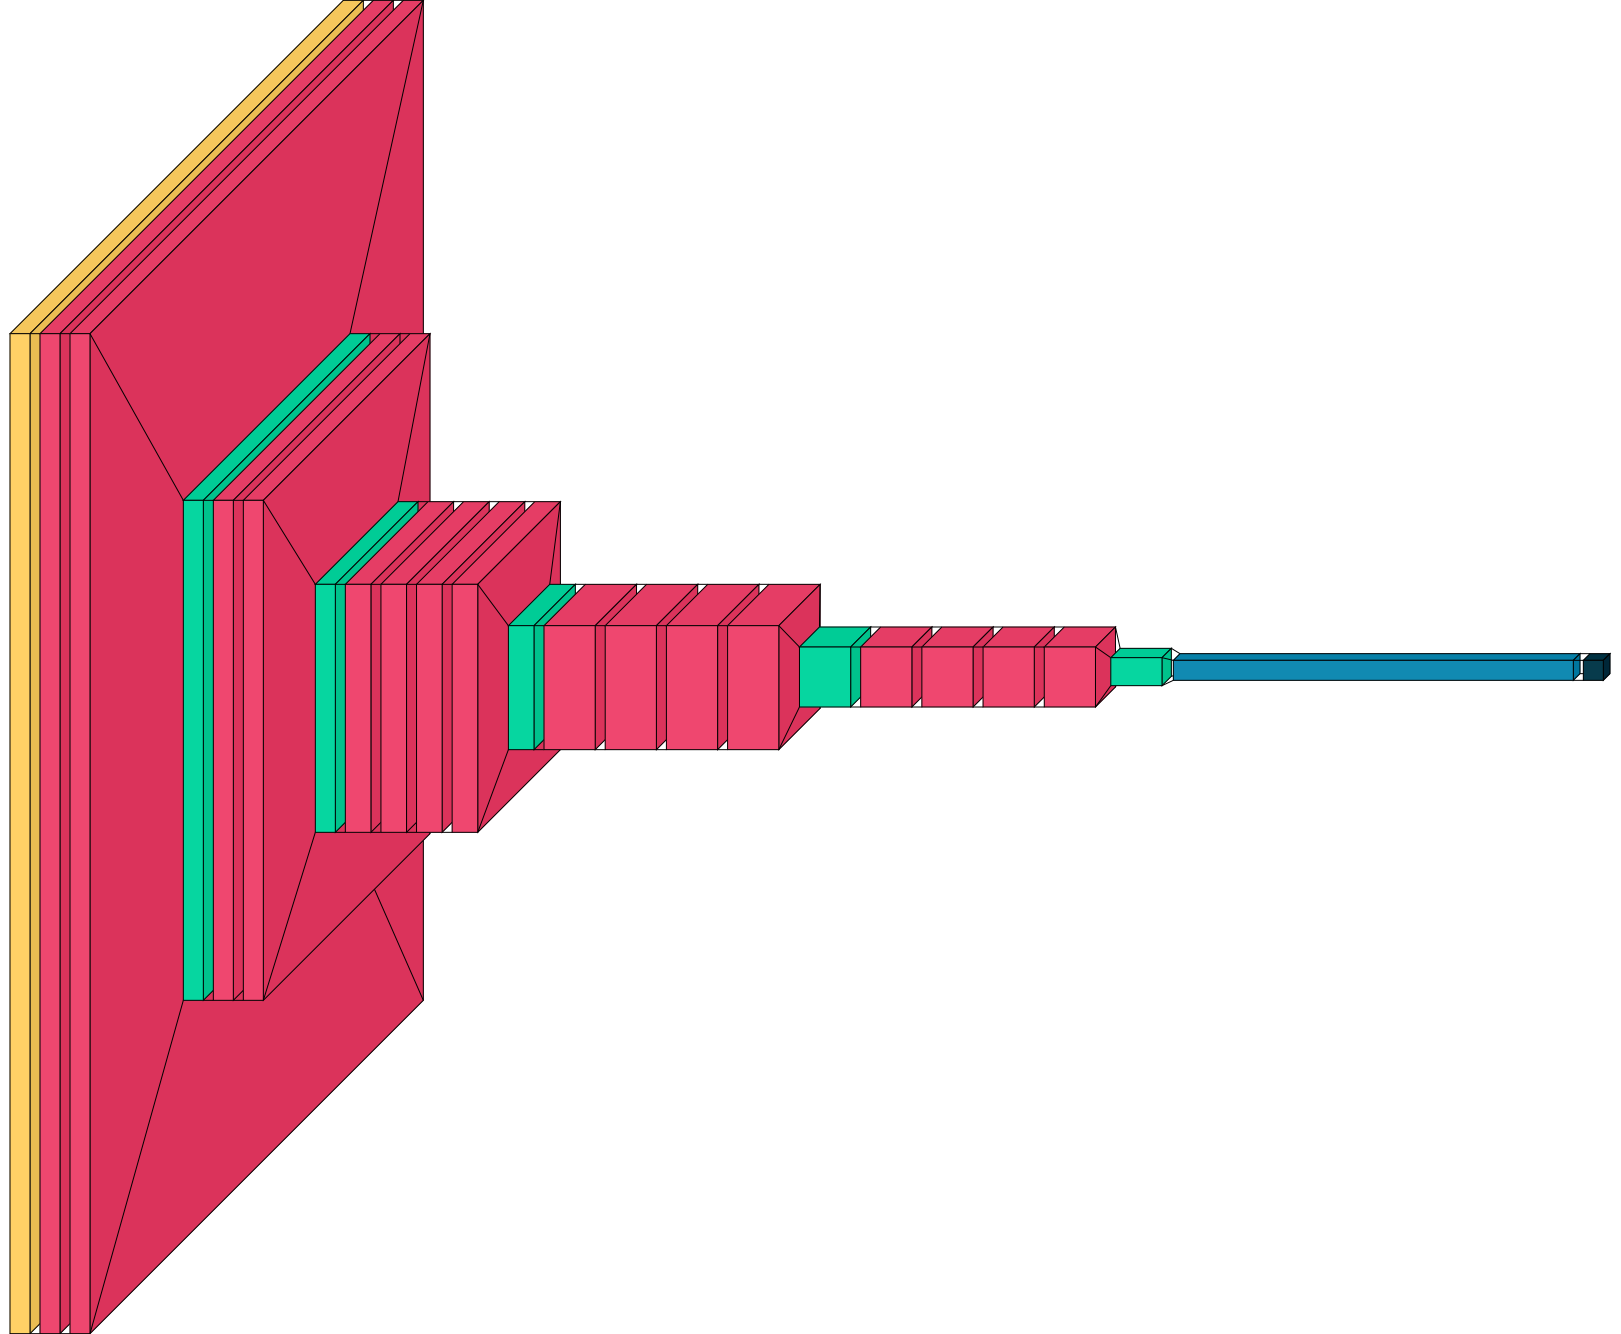

In [26]:
visualkeras.layered_view(model1)

In [27]:
#x
model2.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

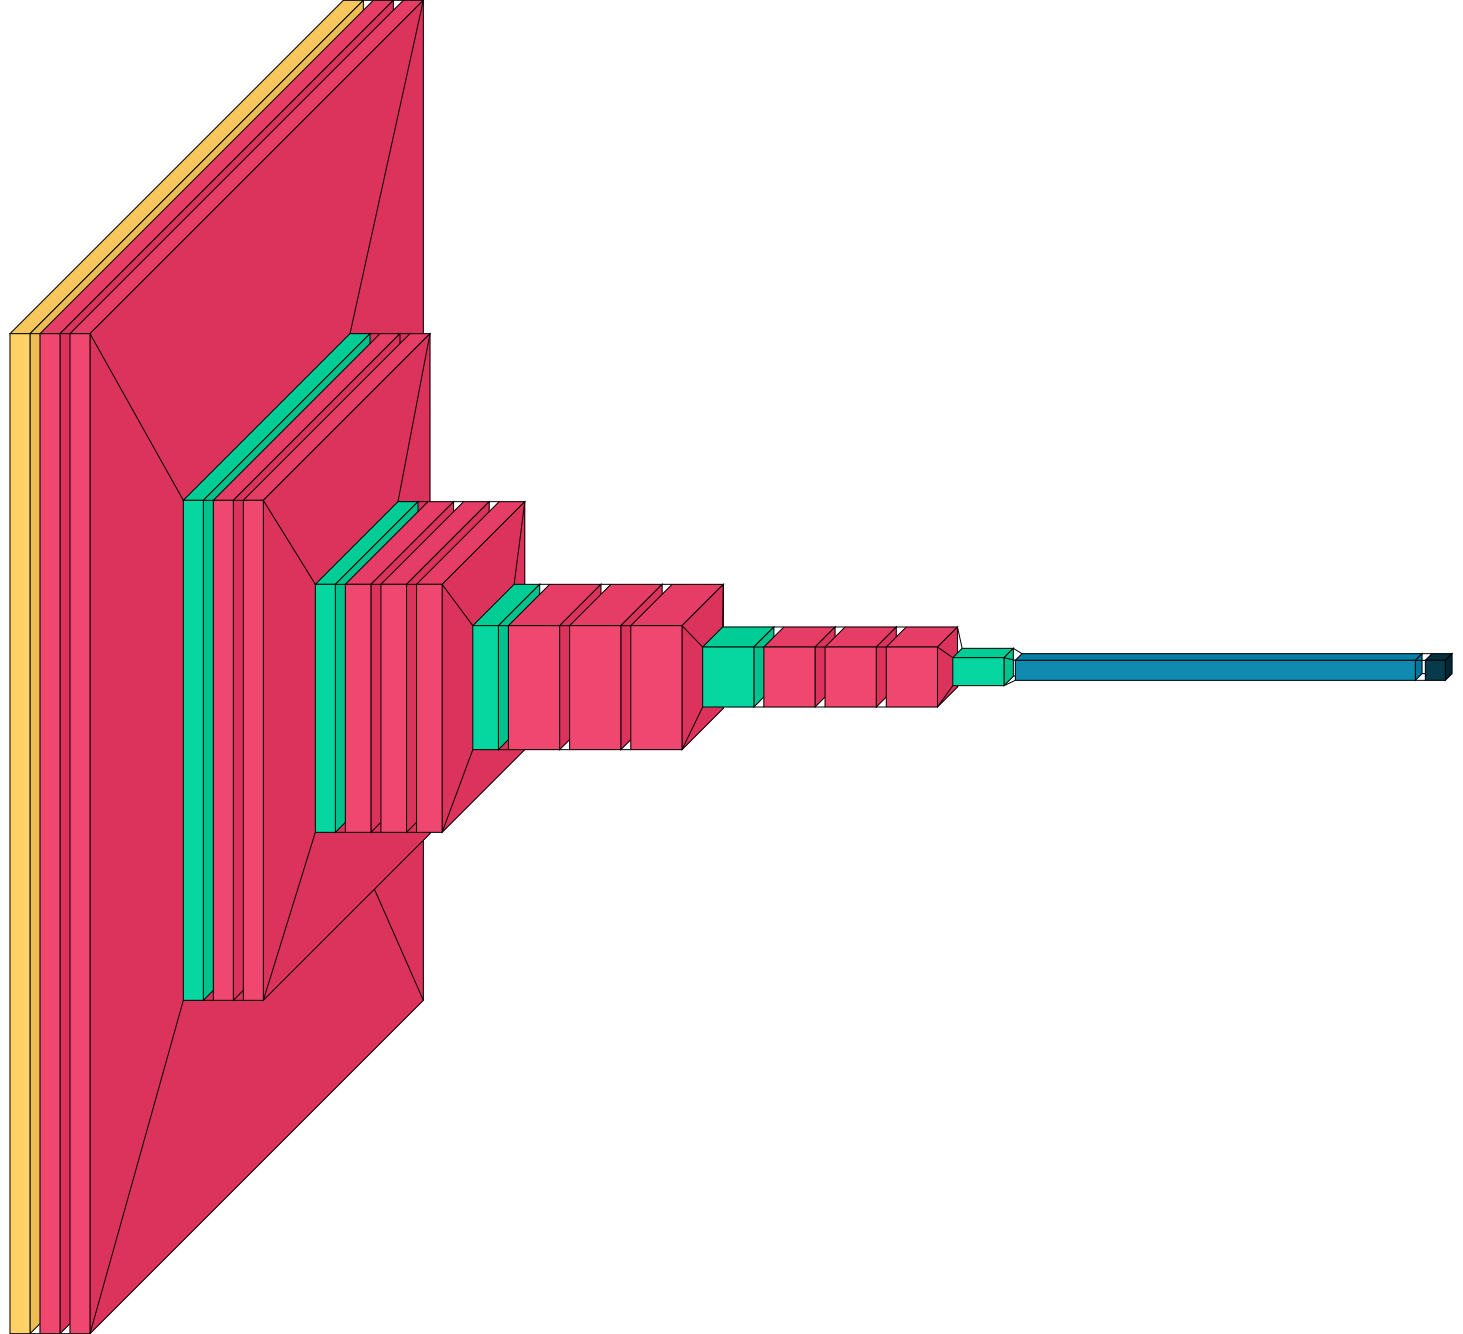

In [28]:
visualkeras.layered_view(model2)

In [29]:
# Fit
history1 = model1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 2,batch_size = 30,
                    shuffle=True)

Epoch 1/2
39/39 [==============================] - 255s 6s/step - loss: 1.3318 - accuracy: 0.4556 - val_loss: 1.1484 - val_accuracy: 0.5048
Epoch 2/2
39/39 [==============================] - 234s 6s/step - loss: 0.6978 - accuracy: 0.7103 - val_loss: 1.4042 - val_accuracy: 0.4857


In [30]:
#x
# Fit
history2 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 2,batch_size = 30,
                    shuffle=True)

Epoch 1/2
39/39 [==============================] - 195s 5s/step - loss: 1.4767 - accuracy: 0.4265 - val_loss: 1.0627 - val_accuracy: 0.4619
Epoch 2/2
39/39 [==============================] - 187s 5s/step - loss: 0.6403 - accuracy: 0.7342 - val_loss: 1.0556 - val_accuracy: 0.5000


In [31]:
#x
model1.save(r'D:\university\Thesis\final\Flower kath golap\saved model\model1.hdf5')

In [32]:
#x
model2.save(r'D:\university\Thesis\final\Flower kath golap\saved model\model2.hdf5')

In [33]:
#x
model3.save(r'D:\university\Thesis\final\Flower kath golap\saved model\model3.hdf5')

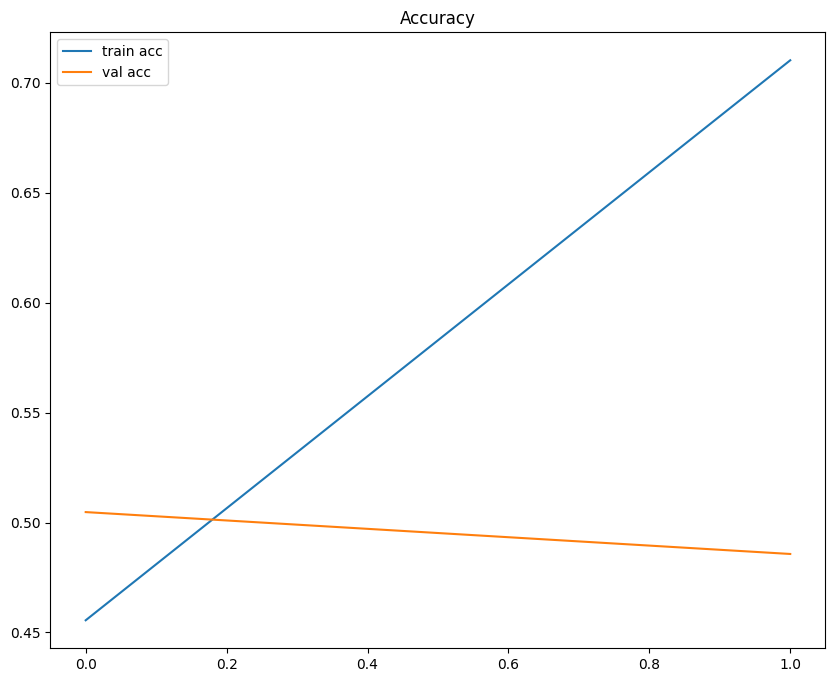

In [34]:
plt.figure(figsize=(10, 8))
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

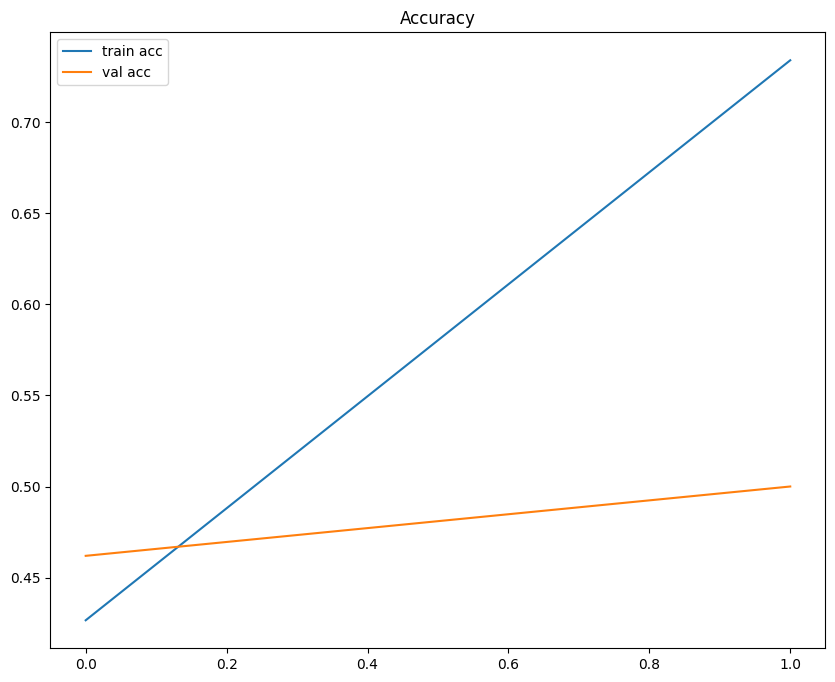

In [35]:
#X
plt.figure(figsize=(10, 8))
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

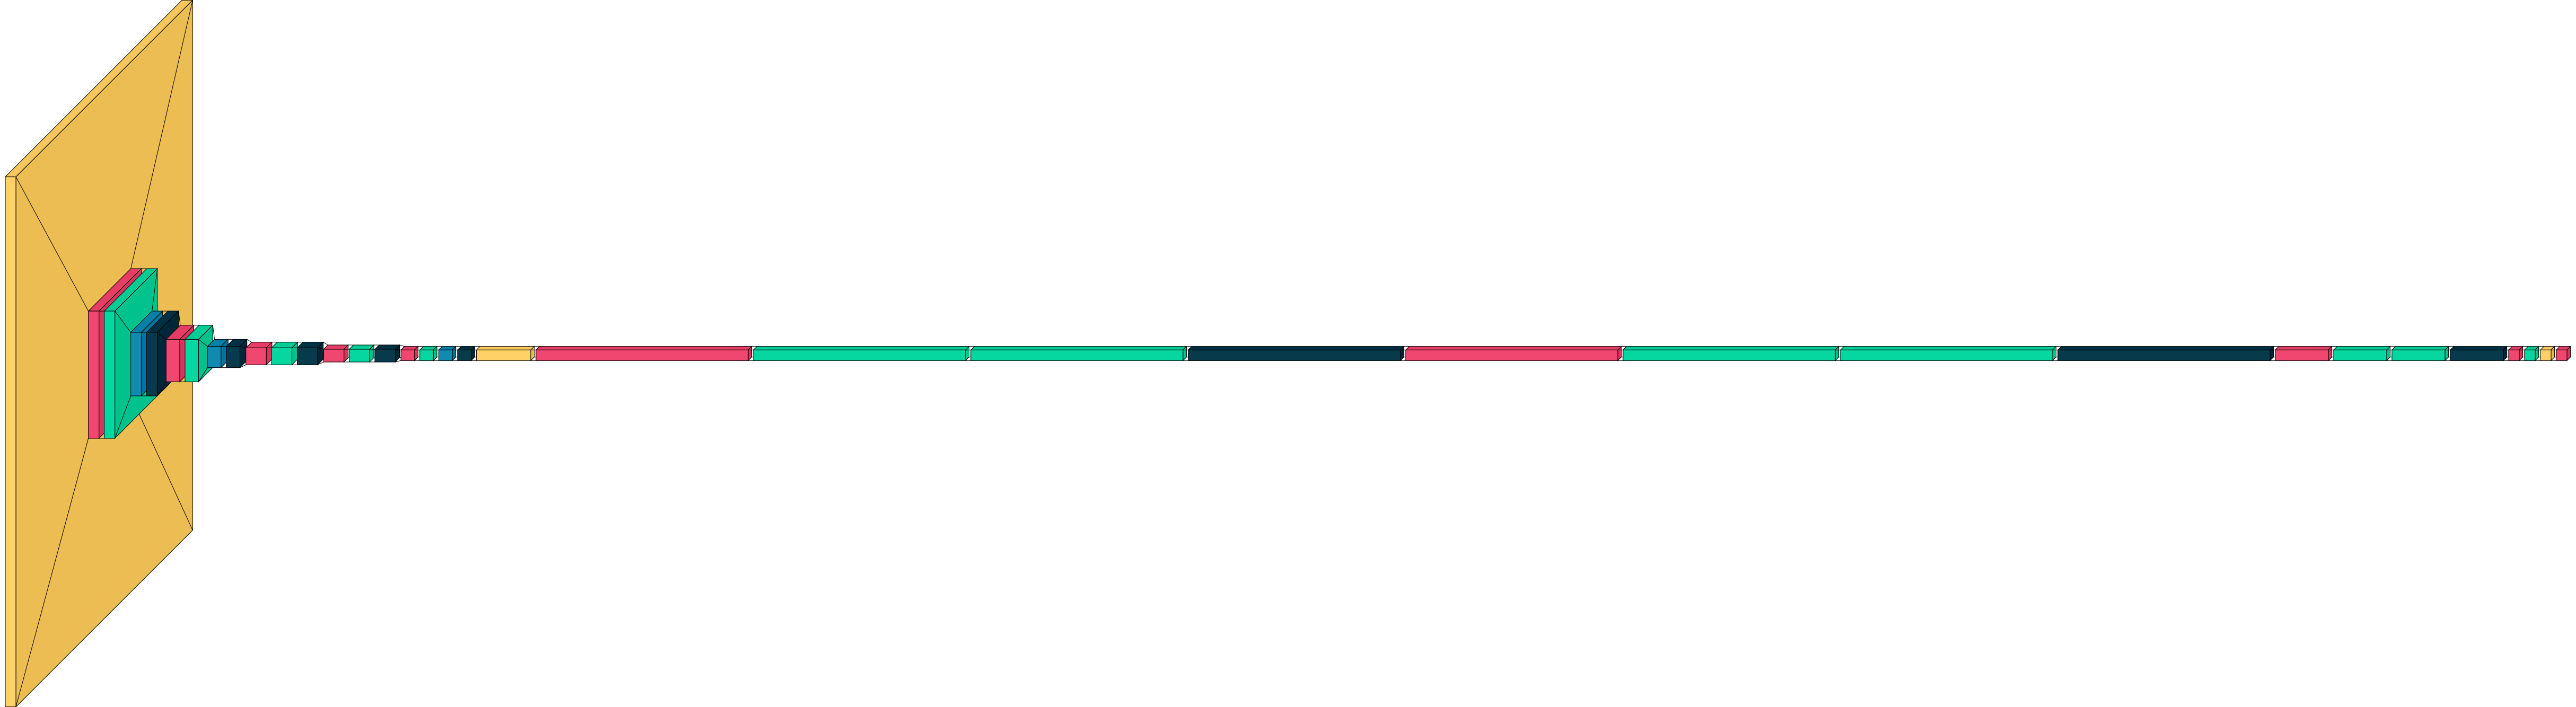

In [36]:
visualkeras.layered_view(model3)

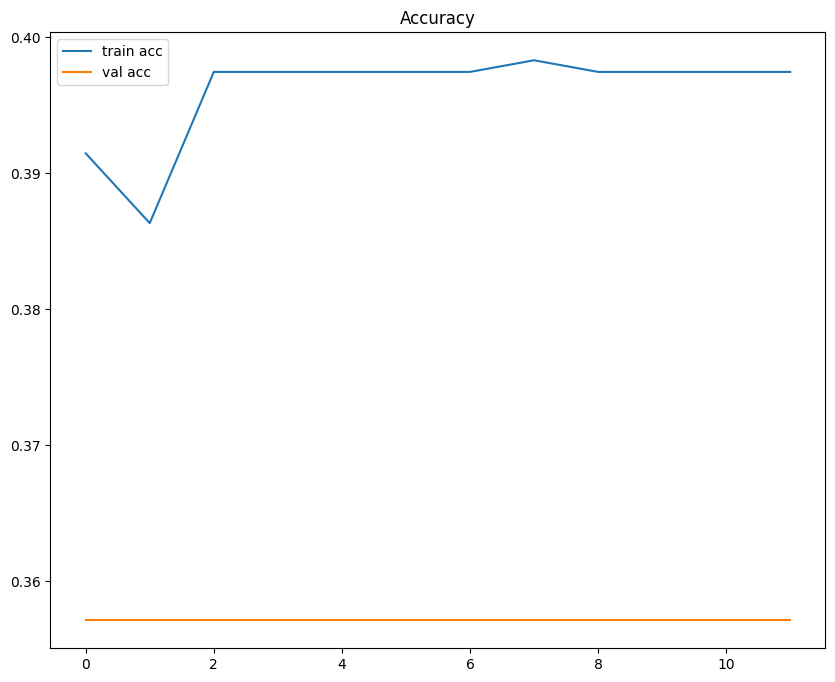

In [37]:
#X
plt.figure(figsize=(10, 8))
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [53]:
from keras.models import load_model

In [58]:
model1 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model1.hdf5')
model2 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model2.hdf5')
model3 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model3.hdf5')

In [59]:
models = [model1, model2, model3]

In [60]:
models.save(r'D:\university\Thesis\final\Flower kath golap\saved model\models.hdf5')

AttributeError: 'list' object has no attribute 'save'

In [52]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

11/11 [==============================] - 3s 259ms/step


In [61]:
print(preds)

[[[0.08535723 0.00653152 0.9081113 ]
  [0.35198584 0.04869414 0.5993199 ]
  [0.70048493 0.05226288 0.24725215]
  ...
  [0.83443904 0.03845817 0.12710279]
  [0.6156839  0.06182178 0.32249436]
  [0.13355441 0.02800749 0.83843803]]

 [[0.04532211 0.04239908 0.91227883]
  [0.47147128 0.1957048  0.3328238 ]
  [0.76899624 0.13704379 0.09396006]
  ...
  [0.6075307  0.2978735  0.09459574]
  [0.53622216 0.05699667 0.40678123]
  [0.03828644 0.02391055 0.93780303]]

 [[0.39552125 0.22898982 0.3754889 ]
  [0.3955579  0.2289531  0.37548897]
  [0.39548147 0.2289889  0.37552953]
  ...
  [0.39556026 0.22906268 0.37537706]
  [0.39555812 0.22897027 0.37547165]
  [0.39561087 0.22899906 0.37539008]]]


In [62]:
ensemble_prediction = np.argmax(summed, axis=1)

In [63]:
print(ensemble_prediction)

[2 2 0 2 0 2 0 2 0 0 0 2 2 0 2 0 0 2 0 0 2 1 2 2 0 2 2 0 1 0 0 2 0 0 2 0 2
 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 0 2 2 0 0 0 0 2 2 0 2 2 0 2 2 0 0 2 2
 2 2 0 2 2 0 1 2 2 2 1 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 0 0 0
 0 2 2 0 2 1 2 0 2 2 2 2 0 1 2 2 2 2 0 2 1 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2
 0 2 2 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 0 0 2
 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 0 2 0 2 2 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2
 2 0 0 0 2 2 0 0 0 0 2 2 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2
 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 0
 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 0 2]


In [64]:
prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)

11/11 [==============================] - 4s 287ms/step


In [66]:
print('prediction1= ', prediction1)

prediction1=  [[8.53572339e-02 6.53152028e-03 9.08111274e-01]
 [3.51985842e-01 4.86941449e-02 5.99319875e-01]
 [7.00484931e-01 5.22628762e-02 2.47252151e-01]
 [8.60315785e-02 3.83624062e-02 8.75605881e-01]
 [6.75111592e-01 3.43326330e-02 2.90555805e-01]
 [2.96057642e-01 5.55466786e-02 6.48395598e-01]
 [9.09016907e-01 8.90767295e-03 8.20754245e-02]
 [2.35086069e-01 7.77691929e-03 7.57137001e-01]
 [3.20969582e-01 6.71654940e-02 6.11864984e-01]
 [8.00260186e-01 4.65420745e-02 1.53197721e-01]
 [5.46325624e-01 4.46787365e-02 4.08995628e-01]
 [3.51985842e-01 4.86941449e-02 5.99319875e-01]
 [2.57131130e-01 7.72446347e-03 7.35144377e-01]
 [3.09614748e-01 1.63047433e-01 5.27337849e-01]
 [4.06997800e-02 1.71447489e-02 9.42155361e-01]
 [9.81207192e-01 5.70239546e-03 1.30904121e-02]
 [4.67031389e-01 4.65629809e-02 4.86405581e-01]
 [9.48360935e-02 1.74856465e-02 8.87678206e-01]
 [6.65098071e-01 4.11219522e-02 2.93780059e-01]
 [6.65098071e-01 4.11219522e-02 2.93780059e-01]
 [1.76058203e-01 1.8537489

In [67]:
prediction1 = np.argmax(prediction1,axis=1)
prediction2 = np.argmax(prediction2,axis=1)
prediction3 = np.argmax(prediction3,axis=1)

In [68]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [69]:
#print('= ', x_test)

In [70]:
#print('= ', y_test)

In [71]:
accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)

In [72]:
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

In [73]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.41846153846153844
Accuracy Score for model2 =  0.49538461538461537
Accuracy Score for model3 =  0.3292307692307692
Accuracy Score for average ensemble =  0.4430769230769231


In [74]:
"""import cv2
image=cv2.imread(str)"""

'import cv2\nimage=cv2.imread(str)'

In [2]:
import random

In [3]:
print(ensemble_prediction)

NameError: name 'ensemble_prediction' is not defined

In [4]:
print(x_test)

NameError: name 'x_test' is not defined

In [5]:
x=np.argmax(x_test)

NameError: name 'np' is not defined

In [79]:
print(x)

100


In [80]:
print(ensemble_prediction)

[2 2 0 2 0 2 0 2 0 0 0 2 2 0 2 0 0 2 0 0 2 1 2 2 0 2 2 0 1 0 0 2 0 0 2 0 2
 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 0 2 2 0 0 0 0 2 2 0 2 2 0 2 2 0 0 2 2
 2 2 0 2 2 0 1 2 2 2 1 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 0 0 0
 0 2 2 0 2 1 2 0 2 2 2 2 0 1 2 2 2 2 0 2 1 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2
 0 2 2 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 0 0 2
 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 0 2 0 2 2 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2
 2 0 0 0 2 2 0 0 0 0 2 2 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2
 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 0
 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 0 2]


In [1]:
img_sample=random.randint(0,len(y_test))
plt.imshow(cv2.cvtColor(x_test[img_sample, :].astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'random' is not defined